In [80]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

## Exercise 1: Binary distribution

In [89]:
n = 1000  # half sample size
theta = np.concatenate((np.linspace(0, np.pi / 2 - 0.1, n), np.linspace(np.pi / 2 + 0.1, np.pi, n)))

plus = 1 / np.sqrt(2) * np.array([1, 1])
minus = 1 / np.sqrt(2) * np.array([1, -1])


def psi0(theta):
    return np.array([np.cos(theta / 2), np.sin(theta / 2)])


def psi1(theta):
    return np.array([np.cos(theta / 2), -np.sin(theta / 2)])


def scalarprod(v1, v2):
    return np.sum(v1 * v2)


def prob(v1, v2):
    return np.abs(scalarprod(v1, v2)) ** 2

## Exercise 2: Three parallel channels

### Part 2

In [90]:
def psi0_B3(theta):
    return np.kron(psi0(theta), np.kron(psi0(theta), psi0(theta)))


def psi1_B3(theta):
    return np.kron(psi0(theta), np.kron(psi1(theta), psi1(theta)))


def psi2_B3(theta):
    return np.kron(psi1(theta), np.kron(psi0(theta), psi1(theta)))


def psi3_B3(theta):
    return np.kron(psi1(theta), np.kron(psi1(theta), psi0(theta)))


def p0(theta):
    return np.outer(psi0_B3(theta), psi0_B3(theta))


def p1(theta):
    return np.outer(psi1_B3(theta), psi1_B3(theta))


def p2(theta):
    return np.outer(psi2_B3(theta), psi2_B3(theta))


def p3(theta):
    return np.outer(psi3_B3(theta), psi3_B3(theta))


def x_x(i):
    v = np.zeros(4)
    v[i] = 1
    return np.outer(v, v)


def rhoB3(theta):
    return 0.25 * (p0(theta) + p1(theta) + p2(theta) + p3(theta))


def L0(theta):
    a = np.real(scipy.linalg.sqrtm(rhoB3(theta)))
    b = scipy.linalg.pinv(a)
    return 0.25 * b @ p0(theta) @ b


def L1(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p1(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


def L2(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p2(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


def L3(theta):
    return (
        0.25
        * scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
        @ p0(theta)
        @ scipy.linalg.pinv(np.real(scipy.linalg.sqrtm(rhoB3(theta))))
    )


# def rhoY(theta):

In [91]:
a, prob, H_YX = [], [], [2]

for counter, omega in enumerate(theta):
    try:
        p00 = np.trace(L0(omega) @ p0(omega))
        p01 = np.trace(L0(omega) @ p1(omega))
        p02 = np.trace(L0(omega) @ p2(omega))
        p03 = np.trace(L0(omega) @ p3(omega))

        p10 = np.trace(L1(omega) @ p0(omega))
        p11 = np.trace(L1(omega) @ p1(omega))
        p12 = np.trace(L1(omega) @ p2(omega))
        p13 = np.trace(L1(omega) @ p3(omega))

        p20 = np.trace(L2(omega) @ p0(omega))
        p21 = np.trace(L2(omega) @ p1(omega))
        p22 = np.trace(L2(omega) @ p2(omega))
        p23 = np.trace(L2(omega) @ p3(omega))

        p30 = np.trace(L3(omega) @ p0(omega))
        p31 = np.trace(L3(omega) @ p1(omega))
        p32 = np.trace(L3(omega) @ p2(omega))
        p33 = np.trace(L3(omega) @ p3(omega))
    except:
        print("Omega skipped")
        a.append(counter)
    else:
        prob.append([p00, p01, p02, p03, p10, p11, p12, p13, p20, p21, p22, p23, p30, p31, p32, p33])

    print(omega)
    prob = list(np.round(prob, decimals=6))

for i in range(2 * n - len(a)):
    H_YX_ = 0 - sum(0.25 * each * np.log2(each) for each in prob[i])
    H_YX.append(H_YX_)

H_YX = np.asarray(H_YX)

prob[0]

0.0
0.0007357660464206586
0.001471532092841317
0.0022072981392619755
0.002943064185682634
0.003678830232103293
0.004414596278523951
0.00515036232494461
0.005886128371365268
0.006621894417785927
0.007357660464206586
0.008093426510627244
0.008829192557047902
0.009564958603468562
0.01030072464988922
0.011036490696309879
0.011772256742730537
0.012508022789151195
0.013243788835571854
0.013979554881992512
0.014715320928413171
0.01545108697483383
0.01618685302125449
0.016922619067675147
0.017658385114095804
0.018394151160516462
0.019129917206937123
0.01986568325335778
0.02060144929977844
0.021337215346199097
0.022072981392619758
0.022808747439040416
0.023544513485461074
0.02428027953188173
0.02501604557830239
0.02575181162472305
0.02648757767114371
0.027223343717564366
0.027959109763985024
0.028694875810405685
0.029430641856826343
0.030166407903247
0.03090217394966766
0.03163793999608832
0.03237370604250898
0.033109472088929635
0.03384523813535029
0.03458100418177095
0.03531677022819161
0.036

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25])

In [92]:
print(a)

[2038, 2060, 2101, 2139, 2149, 2159, 2164, 2173, 2192, 2193, 2212, 2219, 2533, 2538, 2554, 2575, 2585, 2655, 2674, 2701, 2756, 2762, 2799, 2836, 2837, 2868, 2894, 2905, 2908, 2909, 2925, 2945, 3006, 3078, 3087, 3093, 3108, 3117, 3126, 3160, 3182, 3190, 3206, 3214, 3230, 3298, 3309, 3333, 3340, 3362, 3412, 3445, 3457, 3474, 3486, 3499, 3508, 3509, 3514, 3518, 3522, 3530, 3565, 3571, 3581, 3583, 3598, 3623, 3640, 3661, 3664, 3681, 3688, 3731, 3733, 3746, 3751, 3792, 3852, 3867, 3873, 3876, 3895, 3896, 3897, 3921, 3929, 3946, 3948, 3951]


In [93]:
def interpolate_values(values, indices):
    result = list(values)  # Create a copy of the original list to avoid modifying it

    for index in sorted(indices, reverse=True):
        # Ensure the index is within the valid range
        if 0 < index < len(result) - 1:
            # Interpolate using the average of neighboring elements
            interpolated_value = (result[index - 1] + result[index]) / 2.0
            result.insert(index, interpolated_value)

    return result


H_YX_2 = np.array(interpolate_values(H_YX, a))

print(len(H_YX))
print(len(a))
print(len(H_YX_2))

I_XY = 2 - H_YX_2

print(theta[500])

3911
90
3996
0.3678830232103293


# OLD STUFF

In [97]:
def eig1(theta):
    return 1 - (3 / 4) * (np.sin(theta)) ** 2


def eig2(theta):
    return (1 / 4) * (np.sin(theta)) ** 2


I_XB3 = []
for omega in theta:
    I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
    I_XB3.append(I)

/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_91466/665731646.py:11: RuntimeWarning: divide by zero encountered in log2
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))
/var/folders/nv/vf2cm8nn6jjd3h0txmrbrbvh0000gn/T/ipykernel_91466/665731646.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  I = -eig1(omega) * np.log2(eig1(omega)) - 3 * eig2(omega) * np.log2(eig2(omega))


In [100]:
# I_XY = interpolate_values(I_XY, [11, 700, 1300, 1983])

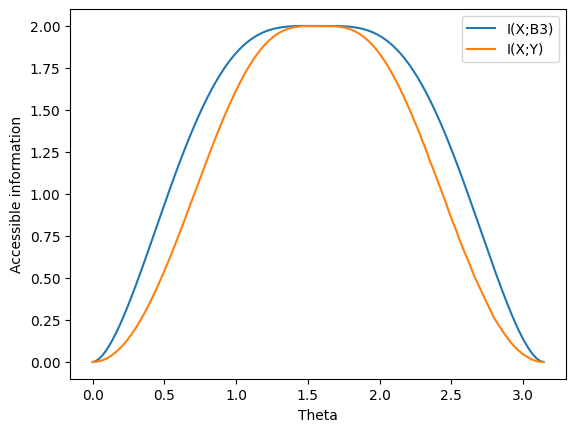

In [109]:
plt.plot(theta, I_XB3, label="I(X;B3)")
plt.plot(theta, I_XY, label="I(X;Y)")


plt.xlabel("Theta")
plt.ylabel("Accessible information")
plt.legend()
plt.show()